<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.</td>
</table>

# Parabolic Problems

In today's lecture we will introduce the **numerical solution of parabolic initial-boundary value problems**. These notes are based largely on the book by Randall LeVeque entitled *Finite Difference Methods for Ordinary and Partial Differential Equations* (SIAM, Philadelphia, PA, 2007).

***

## Introduction

We now apply what we have learned about boundary value problems and initial value problems to solve the canonical parabolic partial differential equation
$$u_t = \kappa u_{xx}, \quad (0,1) \times (0,T), \quad \kappa > 0.$$
For this initial-boundary value problem, we must prescribe an **initial condition** of the form
$$u(x,0) = \eta(x)$$
and **Dirichlet boundary conditions** (for example) of the form
$$
\begin{aligned}
u(0,t) = g_0(t) &, \quad  t > 0,\\
u(1,t) = g_1(t) &, \quad  t > 0.
\end{aligned}
$$
Let's assume $\kappa=1$ without loss of generality. To solve this problem, we introduce a spatial grid of the form $x_i = ih$ with *mesh spacing* $h$ and a temporal grid of the form $t_n = nk$ with *time step* $k$. Let $U_{i}^n \approx u(x_i, t_n)$ be the numerical approximation of the solution at $(x_i, t_n)$. The main idea in the numerical solution is to discretize the spatial derivatives to obtain a system of difference equations that we march in time.

Consider the following two discretizations:

### Explicit Method (Forward Euler in Time)

Suppose we use a second-order centered finite difference approximation for the spatial derivative and a **forward Euler's method** for the time marching to obtain
$$\frac{U_i^{n+1} - U_i^{n}}{k} = \frac{1}{h^2} (U_{i-1}^n - 2U_i^n + U_{i+1}^n).$$
Notice that this is an **explicit method** since we can apply an update formula of the form
$$U_i^{n+1} = U_i^n + \frac{k}{h^2}(U_{i-1}^n - 2U_i^n + U_{i+1}^n).$$
Matricially, it can be written as
$$
\mathbf{U}^{n+1} = (I+kA)\mathbf{U}^{n},
$$
where $\mathbf{U}^{n}=[U_1^{n},\, U_2^{n},\, \dots,\, U_{m-1}^{n},\, U_m^{n}]^T$ with $U_i^0 = \eta(x_i )$, and $A$ is the tridiagonal matrix
$$
A=\frac{1}{h^2}
\begin{bmatrix}
-2 & 1 & 0 & \dots & 0\\
1 & -2 & 1 & 0 & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & 0 & 1 & -2 & 1\\
0 & \dots & 0 & 1 & -2
\end{bmatrix}.
$$
We will show that this method is not useful in practice! To incorporate the boundary conditions, one needs to add the vector
$$
\frac{k}{h^2}
\begin{bmatrix}
g_0(t_n)\\
0\\
\vdots\\
0\\
g_1(t_n)
\end{bmatrix}.
$$

### Implicit Method (Crank-Nicolson)

Instead, let's use the **trapezoidal method** for the time marching, leading to the so-called **Crank-Nicolson method (CN)**:
$$
\frac{U_i^{n+1} - U_i^n}{k} = \frac{1}{2h^2} (U_{i-1}^n - 2U_i^n + U_{i+1}^n) + \frac{1}{2h^2} (U_{i-1}^{n+1} - 2U_i^{n+1} + U_{i+1}^{n+1}).
$$
Notice that this method is **implicit** (it involves an average of the spatial derivative at time level $n$ and $n+1$). Following the same notation, it can be written matricially as
$$
\left(I-\frac{1}{2}kA\right)\mathbf{U}^{n+1} = \left(I+\frac{1}{2}kA\right)\mathbf{U}^{n}.
$$
This is a **tridiagonal system** which needs to be solved for each time step. To incorporate the boundary conditions, one needs to add the vector
$$
\frac{k}{2h^2}
\begin{bmatrix}
g_0(t_{n+1})+g_0(t_n)\\
0\\
\vdots\\
0\\
g_1(t_{n+1})+g_1(t_n)
\end{bmatrix}
$$
to the discretization above.

**Observations:**

* The CN method has a tridiagonal system of $m$ equations which can be solved in $O(m)$ operations. Therefore, it is as efficient as an explicit method *per time step*.
* It allows much **larger time steps** than explicit methods. As a result, it is a very efficient technique for the heat equation (stiffness).
* Solving a parabolic equation with CN requires solving a problem with the structure of an elliptic equation.

***


## Local Truncation Error

We compute the local truncation error in the same way as we have done before: we insert the exact solution $u(x,t)$ into the finite difference equation and determine the leading order error in satisfying the finite difference equation.

### Forward Euler Method

For the forward Euler method
$$U_i^{n+1} = U_i^n + \frac{k}{h^2}(U_{i-1}^n - 2U_i^n + U_{i+1}^n),$$
we substitute $u(x,t)$ and obtain
$$\tau (x, t) = \frac{u(x,t + k) - u(x, t)}{k} - \frac{1}{h^2} [u(x - h, t) - 2u(x, t) + u(x + h, t)].$$
By substituting the following Taylor series expansions, we obtain
$$
\tau(x,t) = \left[ u_t(x,t) + \frac{k}{2} u_{tt} (x,t) + \dots\right] - \left[u_{xx}(x,t)+ \frac{h^2}{12} u_{xxxx} + \dots\right]
$$
We know that $u_t = u_{xx}$ from the original PDE. Moreover, we differentiate this PDE to find that $u_{tt} = (u_{xx})_t = u_{xxxx}$. Thus, we find to leading order that
$$
\tau(x,t) = \left[\frac{1}{2}k - \frac{h^2}{12}\right] u_{xxxx} + O(k^2 + h^4 ).
$$
As a result, we say that this method is **second order in space and first order in time**.

### Crank-Nicolson Method

For the Crank-Nicolson method, the local truncation error is defined as
$$
\tau(x,t) = \frac{1}{k}\left[u(x, t + k) - u(x, t)\right] - \frac{1}{2h^2} [u(x-h, t + k) - 2u(x, t + k) + u(x + h, t + k)] - \frac{1}{2h^2}[u(x - h, t) - 2u(x, t) + u(x + h, t)].
$$
By substituting Taylor series expansions into this expression, we find that
$$
\begin{aligned}
\tau(x, t) &= \left[u_t (x, t) + \frac{k}{2}u_{tt}(x,t) + \frac{k^2}{6} u_{ttt}(x, t) + \dots \right]\\
& \quad -\frac{1}{2}\left[u_{xx}(x, t) + ku_{xxt}(x, t) + \frac{h^2}{12}u_{xxxx}(x, t) + \frac{1}{2}k^2 u_{xxtt} (x, t) + \frac{1}{12}kh^2 u_{xxxxt} (x, t) + \dots \right]\\
& \quad -\frac{1}{2}\left[u_{xx} (x, t) + \frac{1}{12}h^2 u_{xxxx} + \dots\right]
\end{aligned}
$$
Collecting like powers of $k$ and $h$, and using $u_t = u_{xx}$ and its derivatives, we obtain
$$
\tau(x,t) = -\frac{k^2}{12}u_{tttt} - \frac{h^2}{12} u_{xxxx} - \frac{kh^2}{24} u_{xxxxt} + O(k^3 + k^2h^2 + h^4).
$$
We say the Crank-Nicolson method is **second order in space and second order in time**. Just as before, a method is **consistent** if $\tau(x, t) \to 0$ as $k, h \to 0$.

***


## Method of Lines

We can relate our understanding of stability for initial-value problems for ODEs to PDEs using the **method of lines (MOL)**. For MOL, we implement a spatial discretization only for the PDE, which leaves a finite dimensional system of ODEs in time called the *semidiscrete equations*.

If we use a centered, second-order finite difference approximation for $u_{xx}$ in the diffusion equation, we obtain for the grid point $x_i$:
$$U_i'(t) = \frac{1}{h^2} [U_{i-1}(t) - 2U_i(t) + U_{i+1} (t)],\quad i = 1, 2, \dots , m.$$
Including the boundary conditions, we write these semi-discrete equations as the system
$$\mathbf{U}'(t) = A\mathbf{U}(t) + \mathbf{g}(t),$$
with $A$ being the tridiagonal matrix corresponding to the centered finite difference approximation, and $\mathbf{g}(t)$ corresponding to the Dirichlet boundary conditions.

In this form, we can apply any of the ODE methods we've discussed.
* Applying **forward Euler** to this system yields the **Explicit Method**.
* Applying the **trapezoidal method** yields the **Crank-Nicolson method**.

### Stability Analysis via MOL

The MOL is valuable for studying stability. We expect a method to be stable if $k\lambda \in \mathcal{S}$, where $\lambda$ are the eigenvalues of $A$ and $\mathcal{S}$ is the stability region of the time-stepping method. The eigenvalues of $A$ are known explicitly to be
$$\lambda_p = \frac{2}{h^2} [\cos(p\pi h)-1],\quad p = 1, 2, \dots , m,$$
with $h = 1/(m + 1)$. Since $A$ is symmetric negative-definite, all its eigenvalues are real and negative. The largest eigenvalue in magnitude is $\lambda_m \approx -4/h^2$.

1.  **Forward Euler Stability:** The stability region requires $|1 + k\lambda_p | \leq 1$, which for real negative $\lambda_p$ is $-2 \leq k\lambda_p \leq 0$. Using the largest magnitude eigenvalue, we find
    $$-2 \leq \frac{-4k}{h^2} \leq 0, \quad \implies \quad k\leq \frac{h^2}{2}.$$
    This **time step restriction is extreme**; $k$ must be less than a term proportional to $h^2$.

2.  **Crank-Nicolson Stability:** The stability region for the trapezoidal method includes the entire left-half plane. Since the eigenvalues of the system are always negative and real, the Crank-Nicolson method is **stable for any $k > 0$**. We typically choose $k = O(h)$.

The diffusion equation is considered **stiff** because its stiffness ratio is
$$\frac{\max|\lambda_p|}{\min|\lambda_p|} \approx \frac{4}{\pi^2h^2}= O(m^2).$$

***


### Example

Write a **Python program** that implements both the **Explicit Method (Forward Euler)** and the **Crank–Nicolson Method** to solve the following **parabolic partial differential equation (PDE):**

$$
\begin{aligned}
\text{PDE:} \quad & \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}, \quad -1 < x < 1, \quad t > 0,\\
\text{Initial Condition:} \quad & u(x, 0) = e^{-x^2 / (0.2)^2},\\
\text{Boundary Conditions:} \quad & u(-1, t) = 0, \\
& u(1, t) = 0.
\end{aligned}
$$

Implement both time-stepping schemes in Python.

---

#### Tasks

**a)** Plot the numerical solution at several time steps (e.g., $t = 0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03$) to visualize the diffusion process and compare the behavior of the **Explicit** and **Crank–Nicolson** methods.

**b)** Perform a **convergence analysis in time and space** for $T = 0.03$:

* **Convergence:**
  Fix $k=0.5h^2$ for both methods. 
  Compute the numerical solution for successively refined spatial grids (e.g., `m = [11, 21, 41, 81, 161, 321]`). 
  Compare each result to a reference “exact” or highly resolved numerical solution (`m=641`) to compute the **spatial error**, typically using the $L_2$ or $L_\infty$ norm. 
  Estimate the **order of accuracy in space** by fitting the slope of the log–log plot of error vs. $h$.

  ---

**a)** Plot the numerical solution at several time steps (e.g., $t = 0, 0.005, 0.01, 0.015, 0.02$) to visualize the diffusion process and compare the behavior of the **Explicit** and **Crank–Nicolson** methods.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

# --- PDE Parameters ---
T_final = 0.03  # Final time 

# Initial condition
def initial_condition(x):
    return np.exp(-x**2 / (0.2**2))

# Boundary conditions
g_0 = lambda t: 0.0
g_1 = lambda t: 0.0

In [9]:
def solve_explicit(m, T_final):
    # 1. Create the spatial grid x from -1.0 to 1.0 with m points.
    x = np.linspace(-1.0, 1.0, m)
    delta_x = x[1] - x[0]

    # 2. Set the time step delta_t from the stability condition (dt <= 0.5 * delta_x**2).
    delta_t_stable = 0.5 * (delta_x ** 2)
    N = int(np.ceil(T_final / delta_t_stable))
    delta_t = T_final / N
    t = np.linspace(0.0, T_final, N + 1)

    # 3. Initialize the solution array U with the correct shape.
    U = np.zeros((N + 1, m))
    U[0, :] = u0(x)                  # assumes u0 is defined globally

    r = delta_t / (delta_x ** 2)     # Fourier number

    # enforce boundary at t=0
    U[0, 0]  = g_0(t[0])             # assumes g_0 is defined globally
    U[0, -1] = g_1(t[0])             # assumes g_1 is defined globally

    # 4. Time-stepping loop:
    for n in range(N):
        # known boundary at time t[n]
        U[n, 0]  = g_0(t[n])
        U[n, -1] = g_1(t[n])

        # interior update i = 1..m-2
        U[n + 1, 1:-1] = U[n, 1:-1] + r * (U[n, 0:-2] - 2.0 * U[n, 1:-1] + U[n, 2:])

        # apply boundary at time t[n+1]
        U[n + 1, 0]  = g_0(t[n + 1])
        U[n + 1, -1] = g_1(t[n + 1])

    # 5. Return x, t, and U as results.
    return x, t, U

In [10]:
x, t, U = solve_explicit(m=101, T_final=T_final)

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c', 'm', 'y']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 25, 50, 75, 100, 125,150)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % np.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("u(x,t)")
    axes.set_title("Solution to Heat Equation")
    axes.set_xlim([-1,1])
    axes.set_ylim([0.0, 1.0])
axes.legend()
plt.show()

NameError: name 'u0' is not defined

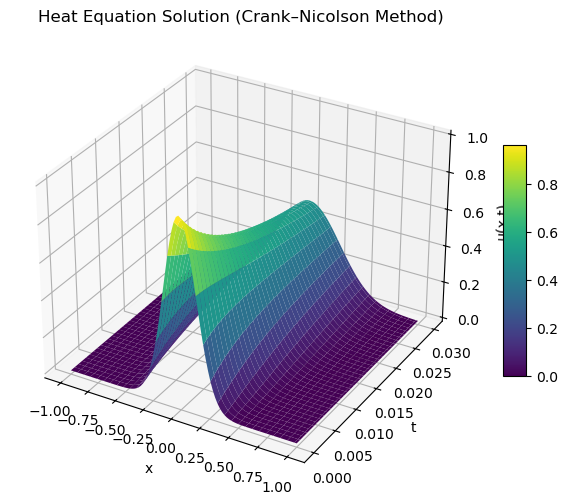

In [192]:
from matplotlib import cm

# Create meshgrid for plotting
X, T = np.meshgrid(x, t)

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, T, U, cmap=cm.viridis, edgecolor='none')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Heat Equation Solution (Crank–Nicolson Method)')

# Optional color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


In [ ]:

def solve_crank_nicolson(m, T_final):
    # 1. Create the spatial grid x from -1.0 to 1.0 with m points.
    x = np.linspace(-1.0, 1.0, m)
    delta_x = x[1] - x[0]

    # 2. Define the time step delta_t (e.g., proportional to delta_x for stability).
    delta_t = delta_x
    N = int(np.ceil(T_final / delta_t))
    delta_t = T_final / N
    t = np.linspace(0.0, T_final, N + 1)

    # 3. Loop over each time step n:
    U = np.zeros((N + 1, m))
    U[0, :] = u0(x)

    # --- Matrices en puntos interiores ---
    M = m - 2  # número de puntos interiores
    r = delta_t / (2.0 * delta_x**2)

    # Tridiagonal T con diag=-2 y sub/superdiag=1
    main = -2.0 * np.ones(M)
    off = 1.0 * np.ones(M - 1)
    Ttri = np.diag(main) + np.diag(off, 1) + np.diag(off, -1)

    A = np.eye(M) - r * Ttri          # Lado implícito
    B = np.eye(M) + r * Ttri          # Lado explícito

    # --- Bucle temporal ---
    for n in range(N):
        # Condiciones de contorno en tiempo n y n+1
        gL_n, gR_n = g_0(t[n]),     g_1(t[n])
        gL_np1, gR_np1 = g_0(t[n+1]), g_1(t[n+1])

        # Impone contorno en la capa n para coherencia
        U[n, 0]  = gL_n
        U[n, -1] = gR_n

        # Vector interior en tiempo n
        U_int = U[n, 1:-1]

        # Términos de contorno para CN: r*(g^{n+1} + g^{n}) en extremos
        bc = np.zeros(M)
        bc[0]  += r * (gL_np1 + gL_n)
        bc[-1] += r * (gR_np1 + gR_n)

        # RHS y resolución del sistema
        b = B @ U_int + bc
        U_next_int = np.linalg.solve(A, b)

        # Escribe capa n+1
        U[n+1, 0]   = gL_np1
        U[n+1, -1]  = gR_np1
        U[n+1, 1:-1] = U_next_int

    # 4. Return x, t, and U as results.

    return x, t, U


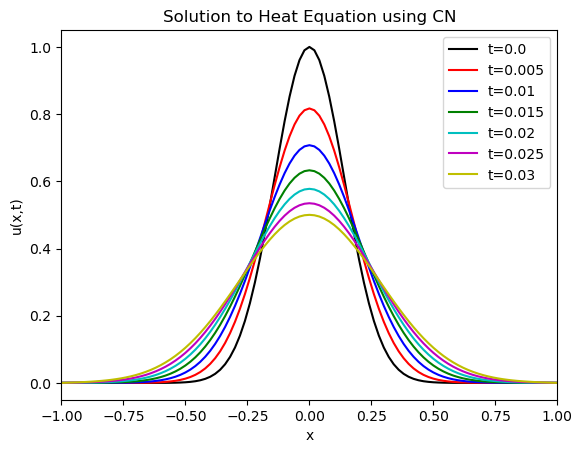

In [195]:
x, t, U = solve_crank_nicolson(m=101, T_final=T_final)

# Plot a few solutions
colors = ['k', 'r', 'b', 'g', 'c', 'm', 'y']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (i, n) in enumerate((0, 25, 50, 75, 100, 125, 150)):
    axes.plot(x, U[n, :], colors[i], label='t=%s' % np.round(t[n], 4))
    axes.set_xlabel("x")
    axes.set_ylabel("u(x,t)")
    axes.set_title("Solution to Heat Equation using CN")
    axes.set_xlim([-1,1])
axes.legend()
plt.show()

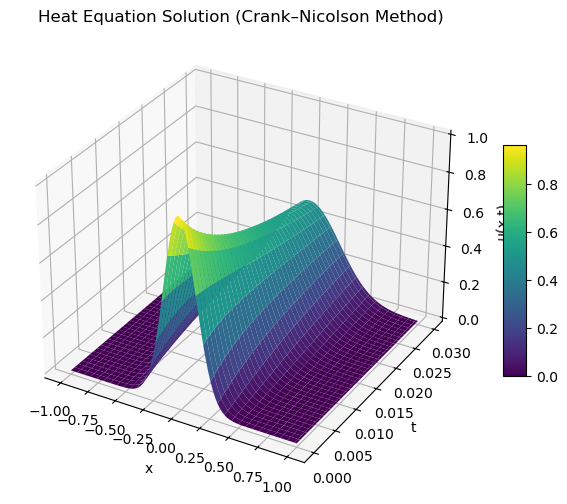

In [196]:
from matplotlib import cm

# Create meshgrid for plotting
X, T = np.meshgrid(x, t)

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, T, U, cmap=cm.viridis, edgecolor='none')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Heat Equation Solution (Crank–Nicolson Method)')

# Optional color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


**b)** Perform a **convergence analysis in time and space** for $T = 0.03$:

* **Convergence:**
  Fix $k=0.5h^2$ for both methods. 
  Compute the numerical solution for successively refined spatial grids (e.g., `m = [11, 21, 41, 81, 161, 321]`). 
  Compare each result to a reference “exact” or highly resolved numerical solution (`m=641`) to compute the **spatial error**, typically using the $L_2$ or $L_\infty$ norm. 
  Estimate the **order of accuracy in space** by fitting the slope of the log–log plot of error vs. $h$.


In [197]:
import numpy as np

# Calculate the fine-grid solution once
mfine = 641
x_fine, _, U_fine = solve_explicit(m=mfine, T_final=T_final)
U_fine_final = U_fine[-1, :]

errors = []
ms = [11, 21, 41, 81, 161, 321]

print(f"{'m':>5} {'error':>15} {'order':>10}")
print("-" * 32)

for m in ms:
    x, t, U = solve_explicit(m=m, T_final=T_final)
    
    # Step to subsample the fine solution
    step = int((mfine - 1) / (m - 1))
    
    # Compute max error at final time
    error = np.max(np.abs(U[-1, :] - U_fine_final[::step]))
    errors.append(error)
    
    # Compute order if not first row
    if len(errors) == 1:
        order = "-"
    else:
        h1 = 1 / (ms[len(errors)-2] - 1)
        h2 = 1 / (ms[len(errors)-1] - 1)
        order = np.log(errors[-2] / errors[-1]) / np.log(h1 / h2)
        order = f"{order:.2f}"
    
    print(f"{m:5d} {error:15.6e} {order:>10}")


    m           error      order
--------------------------------
   11    4.481694e-01          -
   21    1.999379e-02       4.49
   41    3.132493e-03       2.67
   81    7.339306e-04       2.09
  161    1.874378e-04       1.97
  321    6.749235e-05       1.47


In [198]:
import numpy as np

# Calculate the fine-grid solution once
mfine = 641
x_fine, _, U_fine = solve_crank_nicolson(m=mfine, T_final=T_final)
U_fine_final = U_fine[-1, :]

errors = []
ms = [11, 21, 41, 81, 161, 321]

print(f"{'m':>5} {'error':>15} {'order':>10}")
print("-" * 32)

for m in ms:
    x, t, U = solve_crank_nicolson(m=m, T_final=T_final)
    
    # Step to subsample the fine solution
    step = int((mfine - 1) / (m - 1))

    # Compute max error at final time
    error = np.max(np.abs(U[-1, :] - U_fine_final[::step]))
    errors.append(error)
    
    # Compute order if not first row
    if len(errors) == 1:
        order = "-"
    else:
        h1 = 1 / (ms[len(errors)-2] - 1)
        h2 = 1 / (ms[len(errors)-1] - 1)
        order = np.log(errors[-2] / errors[-1]) / np.log(h1 / h2)
        order = f"{order:.2f}"
    
    print(f"{m:5d} {error:15.6e} {order:>10}")


    m           error      order
--------------------------------
   11    2.232954e-02          -
   21    5.220336e-03       2.10
   41    1.419306e-03       1.88
   81    3.580007e-04       1.99
  161    8.567576e-05       2.06
  321    1.715702e-05       2.32


--- 

## Stiffness and the Heat Equation

Recall that the largest eigenvalue of the discrete system for $u_{xx} = f(x)$ behave as $\lambda_m = -4 / h^2$ while the smallest is $\lambda_1 \approx -\pi^2$.  The stiffness ratio then is approximately
$$
    \frac{\lambda_m}{\lambda_1} \approx \frac{4 \pi^2}{h^2} \rightarrow \infty \quad \text{as} \quad h \rightarrow 0.
$$
This stiffness is due to the nature of the heat equation.  The action of the equation is quick for high-frequency data and slow on low-frequency data.  We can see this via a Fourier analysis of the original equation, if we assume $g_0(t) = g_1(t) = 0$ then the solution to the heat equation goes as
$$
    u(x,t) = \sum^\infty_{j=1} \hat{u~}_j(t) \sin (j \pi x).
$$
To find the coefficients $\hat{u~}_j(t)$ we plug this series into the original PDE to find
$$
    \hat{u~}'_j(t) = -j^2 \pi^2 \hat{u~}_j(t)
$$
leading to solutions of the form
$$
    \hat{u~}_j(t) =  \hat{u~}_j(0) e^{-j^2 \pi^2 t}.
$$
Here we see how the original data $\hat{u}_j(0)$, the initial condition, is broken up into its Fourier components with the higher frequencies damped out much faster in time than the lower frequency components.
If we desire the solution to the heat equation over large time periods, say to study what the steady-state might be, we would be in trouble if using time discretization that does not allow for large time steps.  If we choose a discretization that does not have a stability limitation we only need to worry about the accuracy of the method.  For instance, if we wanted the same order of accuracy in space and time we might choose $k \approx h$ which we can only do in the instance where we do not have a stability limitation.

---

## Convergence

We now turn to the question as to how for a given point $(x_i,t_n)$ that our approximation $U^n_i$ is converging to the true solution $u(x_i, t_n)$.  Note now that we have both $k$ and $h$ that we want to go to zero.  This in essence creates a sequence of grids in space and time denoted by $(k_1, h_1)$, $(k_2, h_2)$, etc.
It turns out the relationship between $k$ and $h$ that needs to hold for convergence to occur is the same as the stability result we found before.  It is sometimes useful then to think of the convergence criteria as a rule relating $k$ and $h$ so in essence we only have one parameter to vary.
While we are at it let's generalize this to a class of methods that can be written as
$$
    U^{n+1} = B(k) U^n + b^n(k).
$$
for $B(k) \in \mathbb R^{m\times m}$ on a grid with $h = 1 / (m + 1)$ and $b^n(k) \in \mathbb R^m$.  Here we let $k \rightarrow 0$ and determine $h$ from the stability or accuracy relationship between $k$ and $h$.
As an example, the forward Euler method presented can be written as 
$$
    U^{n+1} = U^n + k A U^n \Rightarrow     B(k) = I + k A, \quad b^n(k) = 0
$$ 
where $A$ is the tridiagonal discretization the arises from a second order, centered difference approximation.  

See if you can figure out what the Crank-Nicholson method would be (in $B(k)$).
For Crank-Nicholson we have
$$
    B(k) = \left( I - \frac{k}{2} A \right )^{-1} \left( I + \frac{k}{2} A \right ).
$$
We now turn to a formal definition of convergence but to do so we need some additional definitions of stability and consistency to show convergence.

A linear method of the form
$$
    U^{n+1} = B(k) U^n + b^n(k)
$$
is *Lax-Richtmyer stable* if, for each time $T$, there is a constant $C_T > 0$ such that
$$
    ||B(k)^n|| \leq C_T
$$
for all $k > 0$ and $n \in \mathbb Z$ for which $k n \leq T$.

*Lax Equivalence Theorem* - A consistent linear method of the same form is convergent if and only if it is Lax-Richtmyer stable.
The basic idea behind these results are similar to those we saw when looking at Euler's method.  Applying the general linear form to the true solution we find
$$
    u(x, t_{n+1}) = B u(x, t_{n}) + b(t_n) + k \tau(x, t_n)
$$
where $u$ is a vector evaluated at the spatial points defined by $x \in \mathbb R^m$.  Subtracting this expression by the original linear scheme we find
$$
    U^{n+1} - u(x, t_{n+1}) = B (U^{n} - u(x, t_{n})) - k \tau^n \\
    E^{n+1} = B E^{n} - k \tau^n.
$$
After $N$ time steps then we have
$$
    E^N = B^N E^0 - k \sum^N_{n=1} B^{N - n} \tau^{n-1}.
$$
Using an appropriate norm we then have the relationship
$$
    ||E^N|| \leq ||B^N || ||E^0|| + k \sum^N_{n=1} ||B^{N - n}||  ||\tau^{n-1}||.
$$

If the method is Lax-Richtmyer stable we then know that for $N k \leq T$
$$
    ||E^N|| \leq C_T ||E^0|| + T C_T \max_{1 \leq n \leq N} ||\tau^{n-1}||.
$$
As $k \rightarrow 0$ then this error goes to $0$ as long as the method is consistent ($\tau \rightarrow 0$) and $E^0 \rightarrow 0$.
To make this more concrete consider again the forward Euler discretization where in the 2-norm we know
$$
    ||B(k)||_2 \leq 1
$$
provided $k / h^2 \leq 1 / 2$.  This implies Lax-Richtmyer stability and therefore the method is convergent.

Similarly for the Crank-Nicholson method we see that the method is Lax-Richtmyer stable for any $k$ and $h$ choice as the eigenvalues of $B(k)$ in this case is
$$
    \lambda = \frac{1 + k \lambda_p / 2}{1 - k \lambda_p / 2}.
$$
Note finally that for the methods we have considered so far we have had $||B|| \leq 1$ which is called *strong stability*.  In reality Lax-Richtmyer stability is weaker than this and is true if an $\alpha$ can be found such that
$$
    ||B(k)|| \leq 1 + \alpha k.
$$

---

## Von Neumann Analysis

An alternative to the method of lines analysis above is to use Fourier analysis to understand how different numerical modes of the method evolve in time, called *von Neumann analysis*. This generally limits this analysis approach to constant coefficient, linear PDEs but can be an immensely powerful way to analyze a method's stability properties more easily.  For this analysis we also generally analyze the PDE as a *Cauchy problem* to eliminate the issues associated with boundary conditions.
Using the exponential form of the Fourier transform we know that in general the eigenfunctions of a spatial derivative are transformed to algebraic relationships since
$$
    \partial_x e^{i \xi x} = i \xi e^{i \xi x}.
$$
Similarly we know that a discretized version of this eigenfunction
$$
    W_j = e^{i j h \xi}
$$
for translation-invariant finite difference operators.
For instance let's apply this grid function to the centered, second order finite difference approximation to the first derivative:
$$\begin{aligned}
    D_0 W_j &= \frac{e^{i (j+1) h \xi} - e^{i (j-1) h \xi}}{2 h} \\ 
    &= e^{i j h \xi} \frac{e^{i h \xi} - e^{-i h \xi}}{2 h} \\
    &=\frac{i}{h} \sin(h \xi) e^{i j h \xi} \\
    &=\frac{i}{h} \sin(h \xi) W_j.
\end{aligned}$$
We then know that W_j is an eigenfunction of $D_0$ with a corresponding eigenvalue of $\frac{i}{h} \sin(h \xi)$.
One important note about these eigenvalues can be shown by expanding the eigenvalues in a Taylor series to find
$$
    \frac{i}{h} \sin(h \xi) = \frac{i}{h} \left( h \xi - \frac{1}{6} h^3 \xi^3 + \cdots \right ) = i \xi - \frac{i}{6} h^2 \xi^2 + \cdots
$$
which as $h \rightarrow 0$ agrees with the continuous eigenvalues.
Now suppose that we have another grid function $V_j$ defined at $x_j = j h$ for $j = 0, \pm 1, \pm 2, \ldots$.  Assume that $V_j$ is an $\ell_2$ function in the sense
$$
    ||U||_2 = \left( h \sum^\infty_{j=-\infty} |U_j|^2 \right )^{1/2} < \infty.
$$
If this is true we can then take the Fourier transform of the grid function such that
$$
    V_j = \frac{1}{\sqrt{2 \pi}} \int^{\pi/h}_{-\pi / h} \hat{V~}(\xi) e^{ij h \xi} d\xi
$$
where the Fourier coefficients are
$$
    \hat{V~}(\xi) = \frac{h}{\sqrt{2 \pi}} \sum^\infty_{j=-\infty} V_j e^{-i j h \xi}.
$$
Due to Parseval's relation we also know that $||\hat{V~}||_2 = ||V||_2$.
Turning back to our original goal, showing stability, we know we need to somehow show that
$$
    \| U^{n+1} \|_2 \leq (1 + \alpha k) \|U^n\|_2.
$$
Using Perseval's relation we know
$$
    \|\hat{U~}^{n+1}\|_2 \leq (1 + \alpha k) \|\hat{U~}^n\|_2.
$$
Since we can transform away the discrete spatial operators we can then get at these results more easily than with the original form of the relation.  For instance
$$
    \hat{U~}^{n+1}(\xi) = g(\xi) \hat{U~}^n(\xi)
$$
where now the factor $g(\xi)$ gives the *amplification factor* for a particular wave number $\xi$.  If we can show that
$$
    |g(\xi)| \leq 1 + \alpha k
$$
where $\alpha$ is independent of $\xi$ then we would have
$$
    |\hat{U~}^{n+1}| \leq (1 + \alpha k) |\hat{U~}^n|
$$
for all $\xi$ and therefore
$$
    \|\hat{U~}^{n+1}\|_2 \leq (1 + \alpha k) \|\hat{U~}^n\|_2.
$$
### Example - Forward Euler

Let's consider how our original discretization of the heat equation looks within the framework just developed.  The method was
$$
    U_j^{n+1} = U^n_j + \frac{k}{h^2} (U^n_{j+1} - 2 U^n_j + U^n_{j-1} ).
$$
See if you can derive $g(\xi)$ and therefore the stability criteria.
Setting $U^n_j = e^{i j h \xi}$ we have
$$\begin{aligned}
    U_j^{n+1} &= U^n_j + \frac{k}{h^2} (e^{i h \xi} U^n_j -2 U^n_j + e^{-i h \xi} U^n_j) \\
    &= \left(1 + \frac{k}{h^2} \left(e^{i h \xi} -2+ e^{-i h \xi} \right) \right ) U^n_j \\
    &= g(\xi) U^n_j.
\end{aligned}$$
Rewriting the amplification factor slightly we have
$$
    g(\xi) = 1 + 2 \frac{k}{h^2} (\cos(\xi h) - 1)
$$
that, since $-1 \leq \cos (\xi h) \leq 1$ for all $\xi$ we can bound $g(\xi)$ as 
$$
    1 -4 \frac{k}{h^2} \leq g(\xi) \leq 1 \quad \forall \xi.
$$
We therefore know the method is stable if
$$
    \frac{4 k}{h^2} \leq 2
$$
as we found before.
### Example - Crank-Nicholson

Again substituting the function $U^n_j = e^{ijh \xi}$ into the method
$$
    U^{n+1}_j = U^n_j + \frac{k}{2 h^2} (U^n_{j-1} - 2 U^n_{j} + U^n_{j+1} + U^{n+1}_{j-1} - 2 U^{n+1}_{j} + U^{n+1}_{j+1})
$$
leads to
$$
    U^{n+1}_j = U^n_j + \frac{k}{2 h^2} \left[ \left(e^{i h \xi} - 2 + e^{-ih \xi} \right) U^n_{j}+ \left(e^{i h \xi} - 2 + e^{-ih \xi} \right) U^{n+1}_{j} \right ]
$$
and therefore
$$
    g(\xi) = 1 + \frac{k}{2 h^2} \left(  e^{i h \xi} - 2 + e^{-ih \xi} \right ) (1 + g(\xi))
$$
noting that $U^{n+1}_j = g(\xi) U^n_j$ by assumption.

Solving this for the amplification factor leads to
$$
    g = \frac{1+ \frac{z}{2}}{1 - \frac{z}{2}}
$$
where
$$
    z = \frac{k}{h^2} \left (e^{i h \xi} - 2 + e^{-ih \xi} \right ) = \frac{2 k}{h^2} (\cos(\xi h) - 1).
$$
Observing that $z \leq 0$ for all $\xi$ we then conclude that the method is stable regardless of the choice of $k $ and $h$.

---

## Multiple Spatial Dimensions

We can of course continue our analysis by considering multiple spatial dimensions.  For the heat equation in 2 spatial dimensions we have
$$
    u_t = u_{xx} + u_{yy}
$$
with appropriate two-dimensional initial conditions and boundary conditions.
Using the discrete form of the Laplacian discretization we derived before we can write for instance a Crank-Nicholson method for this PDE as 
$$
    U^{n+1}_{ij} = U^n_{ij} + \frac{k}{2} \left (\nabla^2_{h} U^n_{ij} + \nabla^2_{h} U^{n+1}_{ij} \right),
$$
where we have assummed that $h = \Delta y = h$.  In general this forms a system of equations that must be solved that has the structure $A U^{n+1}_{ij} = b$.  To construct the system of equations rewrite the method above as
$$
    \left(I - \frac{k}{2} \nabla^2_{h} \right ) U^{n+1}_{ij} = \left(I + \frac{k}{2} \nabla^2_{h} \right ) U^{n}_{ij}
$$
so that we have
$$
    A = I - \frac{k}{2} \nabla^2_{h} 
$$
and
$$
    b = \left(I + \frac{k}{2} \nabla^2_{h} \right ) U^{n}_{ij}.
$$
We can then use our methods for solving the resulting large, sparse linear system at every time step to evolve the system.
In terms of the stability of this method we can compute the eigenvalues of $A$ to find
$$
    \lambda_{p,q} = 1 - \frac{k}{h^2} ((\cos(p \pi h) -1) + (\cos(q \pi h) - 1))
$$
using our knowledge of the eigenvalues of $\nabla^2_{h}$.
With these in hand we know a lot about how hard this problem will be to solve.  For instance we know that the largest (in magnitude) eigenvalue will go as $\mathcal{O}(k / h^2)$ and the one closest to the origin will go as $\mathcal{O}(k) + 1$ leading to a condition number for $A$ on the order $\mathcal{O}(k / h^2)$.  This is actually nice for us as now $k$ also effects the condition number of the matrix while before when considering this problem it was only $\mathcal{O}(1 / h^2)$.
Application of the iterative methods we examined earlier at this stage should work well.  Note that for an initial guess we can use the previous time-step's answer or an explicit time step to extrapolate a guess for the solution.
### Dimensional Splitting

Another approach to discretization of multiple spatial dimensions is to break up the problem into multiple single-spatial dimensional problems.  In other words we would solve a two step process as
$$\begin{aligned}
    U^\ast_{ij} = U^n_{ij} + \frac{k}{2} (D^2_x U^n_{ij} + D^2_x U^\ast_{ij}) \\
    U^{n+1}_{ij} = U^\ast_{ij} + \frac{k}{2} (D^2_y U^\ast_{ij} + D^2_y U^{n+1}_{ij}).
\end{aligned}$$
This in effect allows the quantity $U$ to diffuse in the x-direction first and then independently in the y-direction.
Does this work though?  

Ignoring boundary conditions this works as well as the coupled approach from above as $k \rightarrow 0$!  This comes from the fact that the operators $\partial_{xx}$ and $\partial_{yy}$ commute with each other, a fact we will come back to when considering more general splitting approaches.
What about the boundary conditions though?

Due to the two step process we have introduced another needed set of boundary conditions for $U^\ast$ that need to be specified.  In general what should be used is problem dependent and can be non-trivial to produce.  For instance you might think of the process above as taking a half time-step in one direction and so therefore the boundary values should be evaluated at $t_n + k / 2$.
Another splitting approach which partially addresses the boundaries is the alternating direction implicit method defined by
$$\begin{aligned}
    U^\ast_{ij} = U^n_{ij} + \frac{k}{2} (D^2_y U^n_{ij} + D^2_x U^\ast_{ij}) \\
    U^{n+1}_{ij} = U^\ast_{ij} + \frac{k}{2} (D^2_x U^\ast_{ij} + D^2_y U^{n+1}_{ij})
\end{aligned}$$
which more directly demonstrates the idea that we are predicting the solution in each direction at time $t_n + k /2$ so here it is consistent to use this as the boundary condition.

---

# Exercises

### Exercise 1

Show that a scheme for the heat equation $u_t = \beta u_{xx}$, of the form
$$U_i^{k+1} = \alpha U_i^k + \frac{1-\alpha}{2} \left(U_{i+1}^k + U_{i-1}^k\right)$$
where $\alpha = 1 - 2\beta\mu$ and $\mu = k /h^2$, is consistent. Find the order of the discretization.

### Exercise 2

If the backward finite difference formula is used for $u_t$ and the central finite difference approximation for $u_{xx}$, i.e., **BW-FD2**:
1.  Write the corresponding numerical scheme matricially.
2.  Determine its corresponding local truncation error. Is it consistent?
3.  Is it possible to choose $k$ such that the discretization becomes $O\left(k^2 + h^4 \right)$?

### Exercise 3

Consider the diffusion and advection equation
$$u_t + u_{x} = \beta u_{xx},\qquad \beta > 0.$$
Use the von Neumann analysis to derive the time step restriction for the scheme
$$\frac{U_i^{k+1} - U_i^k}{k} + \frac{U^{k}_{i+1} - U^k_{i-1}}{2h} = \beta \frac{U^k_{i-1} - 2 U_i^k + U_{i+1}^k}{h^2}.$$

### Exercise 4

Consider the Jacobi iteration for the linear system $A\mathbf{u} = \mathbf{f}$ arising from a centered difference approximation of the boundary value problem $u_{xx}(x) = f(x)$. Show that this iteration can be interpreted as **forward Euler time stepping** applied to the MOL equations arising from a centered difference discretization of the heat equation $u_t (x, t) = u_{xx} (x, t) - f(x)$ with time step $k = \frac{1}{2} h^2$. Note that if the boundary conditions are held constant then the solution to this heat equation decays to the steady state solution that solves the boundary value problem.

### Exercise 5

Implement and compare the
1.  Forward Euler
2.  Crank-Nicolson
3.  Backward Euler (see exercise 2)
4.  BDF2
5.  AB2
6.  MOL (Method of Lines) using Python (`scipy.integrate.solve_ivp` with appropriate methods like Radau or BDF for stiff problems).
methods using Python for the heat equation:
$$
\begin{aligned}
u_t = \beta u_{xx} + f(x,t), \quad a < x < b, \quad t\geq 0,\\
u(x, 0) = u_0 (x), \quad u(a, t) = g_1 (t), \quad u(b, t) = g_2 (t),
\end{aligned}
$$
where $\beta$ is a constant. Use $u(x,t) = x^2\sin(\pi x)\cos t$, $0 < x < 1$, $T= 1$, to test and debug your code. Analyze the different approaches including a grid refinement analysis, error and solution plots for $m = 80$, cputime, etc.

### Exercise 6

In the previous exercise, assume that $u$ is the temperature of a thin rod with one end ($x = b$) just heated. The other end of the rod has a room temperature ($70^{\circ}~C$). Solve the problem and find the history of the solution. Roughly how long does it take for the temperature of the rod to reach the steady state? What is the exact solution of the steady state? **Hint:** Take the initial condition as $u(x, 0) = T_0 e^{-(x-b)/\gamma}$, where $T_0$ and $\gamma$ are two constants, $f(x,t) = 0$, and the Neumann boundary condition $u_x(b,t) = 0$.

### Exercise 7

Carry out the von Neumann analysis to determine the stability of the **$\theta$-method**
$$\frac{U_j^{n+1}- U_j^n}{k} = b\left( \theta\delta_{xx}^2 U_j^n + (1 - \theta) \delta_{xx}^2 U_j^{n+1}\right)$$
for the heat equation $u_t = bu_{xx}$, where
$$\delta_{xx}^2 U j = \frac{U_{j-1} - 2U_j + U_{j+1}}{h^2} \quad\quad 0\leq \theta \leq 1.$$